In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('updated.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital,occupation,relationship,race,sex,capital,capital.1,hours,country,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df1 = df.copy()

In [4]:
df1[df1['workclass']=='?']

,age,workclass,fnlwgt,education,educational-num,marital,occupation,relationship,race,sex,capital,capital.1,hours,country,salary
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [5]:
# replacing ? with NA values
df1['workclass'].replace('?',np.nan,inplace=True)
df1["occupation"].replace('?',np.nan,inplace=True)

In [6]:
df1.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital               0
occupation         2809
relationship          0
race                  0
sex                   0
capital               0
capital.1             0
hours                 0
country               0
salary                0
dtype: int64

In [7]:
# Checking 3 approaches to handle missing values
# Dropping NA VALUE
# Random sample imputatio

## dropping NA value

In [8]:
df2 = df1.copy()

In [9]:
cols = ["workclass","occupation"]


In [10]:
new_df = df2[cols].dropna()

In [11]:
new_df.isna().sum()

workclass     0
occupation    0
dtype: int64

<AxesSubplot:>

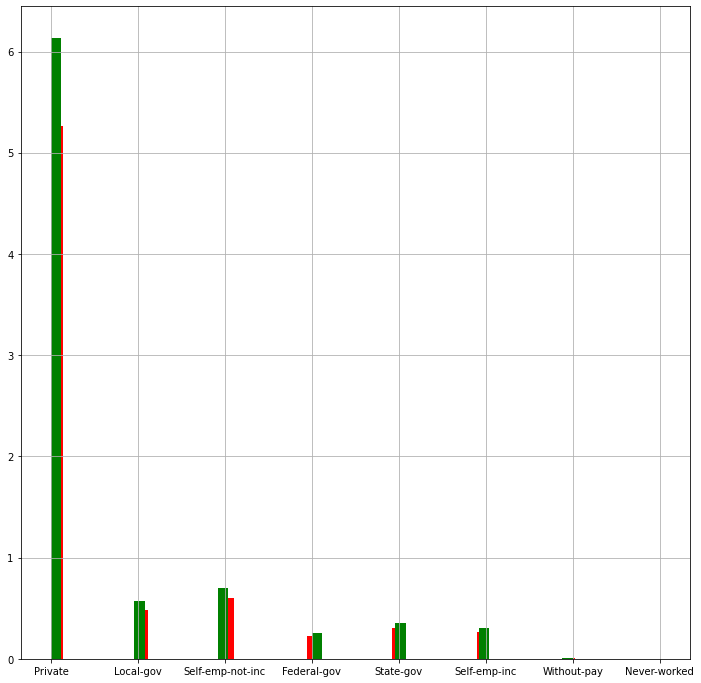

In [12]:
 # Checking Impact of dropna via histograms on workclass column
fig = plt.figure()
ax = fig.add_subplot(111)

df2['workclass'].hist(bins=50,ax=ax,density=True,figsize=(12,12),color='red')
new_df['workclass'].hist(bins=50,ax=ax,density=True,figsize=(12,12),color='green',alpha = 1)

<AxesSubplot:>

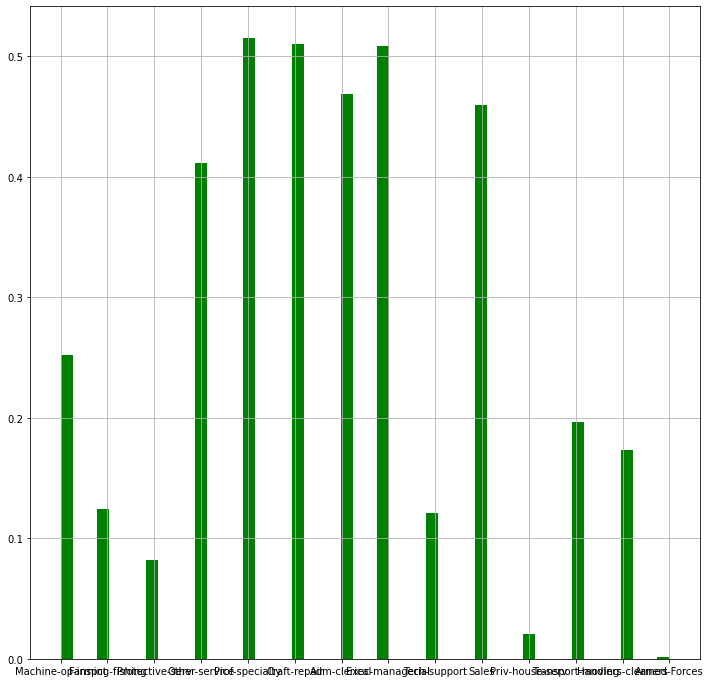

In [13]:
 # Checking Impact of dropna via histograms on occupation column
fig = plt.figure()
ax = fig.add_subplot(111)

df2['occupation'].hist(bins=50,ax=ax,density=True,figsize=(12,12),color='red')
new_df['occupation'].hist(bins=50,ax=ax,density=True,figsize=(12,12),color='green',alpha = 1)

## Random Sample Imputation

In [15]:
df1.isnull().mean()*100

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital            0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
sex                0.000000
capital            0.000000
capital.1          0.000000
hours              0.000000
country            0.000000
salary             0.000000
dtype: float64

<AxesSubplot:>

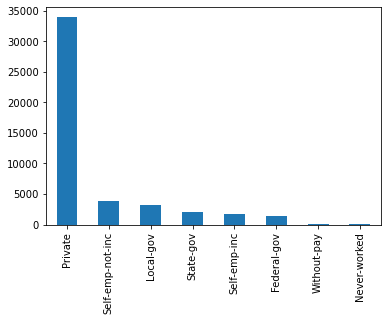

In [16]:
df1["workclass"].value_counts().sort_values(ascending=False).plot.bar()

In [17]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital', 'capital.1',
       'hours', 'country', 'salary'],
      dtype='object')

In [18]:
df1["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [19]:
df3 = df1.copy()

In [21]:
x = df3.drop(columns=["salary"])
y = df3["salary"]

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
x_train["workclass_imputed"] = x_train["workclass"]
x_test["workclass_imputed"] = x_test["workclass"]

C:\Users\DELL\AppData\Local\Temp/ipykernel_27492/1496911773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["workclass_imputed"] = x_train["workclass"]
C:\Users\DELL\AppData\Local\Temp/ipykernel_27492/1496911773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["workclass_imputed"] = x_test["workclass"]


In [24]:
x_train["workclass_imputed"][x_train['workclass_imputed'].isnull()]

19951    NaN
42847    NaN
15408    NaN
19042    NaN
41279    NaN
        ... 
43876    NaN
26297    NaN
31226    NaN
27859    NaN
40390    NaN
Name: workclass_imputed, Length: 2192, dtype: object

In [26]:
x_train["workclass_imputed"].dropna().sample(x_train["workclass"].isnull().sum())

array(['Private', 'Private', 'Private', ..., 'Self-emp-inc', 'Private',
       'Private'], dtype=object)

In [29]:
# random inputation of workclass
x_train["workclass_imputed"][x_train['workclass_imputed'].isnull()] = x_train["workclass_imputed"].dropna().sample(x_train["workclass"].isnull().sum())
x_test["workclass_imputed"][x_test["workclass_imputed"].isnull()] = x_test["workclass_imputed"].dropna().sample(x_test["workclass"].isnull().sum())

C:\Users\DELL\AppData\Local\Temp/ipykernel_27492/3430725773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["workclass_imputed"][x_train['workclass_imputed'].isnull()] = x_train["workclass_imputed"].dropna().sample(x_train["workclass"].isnull().sum())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\DELL\AppData\Local\Temp/ipykernel_27492/3430725773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

In [32]:
x_train["occupation_imputed"] = x_train["occupation"]
x_test["occupation_imputed"] = x_test["occupation"]

C:\Users\DELL\AppData\Local\Temp/ipykernel_27492/1611235331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["occupation_imputed"] = x_train["occupation"]
C:\Users\DELL\AppData\Local\Temp/ipykernel_27492/1611235331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["occupation_imputed"] = x_test["occupation"]


In [33]:
# random inputation of occupation
x_train["occupation_imputed"][x_train['occupation_imputed'].isnull()] = x_train["occupation_imputed"].dropna().sample(x_train["occupation"].isnull().sum())
x_test["occupation_imputed"][x_test["occupation_imputed"].isnull()] = x_test["occupation_imputed"].dropna().sample(x_test["occupation"].isnull().sum())

C:\Users\DELL\AppData\Local\Temp/ipykernel_27492/3044074490.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train["occupation_imputed"][x_train['occupation_imputed'].isnull()] = x_train["occupation_imputed"].dropna().sample(x_train["occupation"].isnull().sum())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\DELL\AppData\Local\Temp/ipykernel_27492/3044074490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital          48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   sex              48842 non-null  object
 10  capital          48842 non-null  int64 
 11  capital.1        48842 non-null  int64 
 12  hours            48842 non-null  int64 
 13  country          48842 non-null  object
 14  salary           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [35]:
## Handling Classes missing values

In [36]:
df3["workclass_imputed"] = df3["workclass"]

In [37]:
df3['workclass_imputed'][df3['workclass_imputed'].isnull()] = df3['workclass'].isnull().sample(df3['workclass'].isnull().sum()).values

C:\Users\DELL\AppData\Local\Temp/ipykernel_27492/213698493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['workclass_imputed'][df3['workclass_imputed'].isnull()] = df3['workclass'].isnull().sample(df3['workclass'].isnull().sum()).values


In [38]:
df3['occupation_imputed'] = df3['occupation']
df3['occupation_imputed'][df3['occupation_imputed'].isnull()] = df3['occupation'].isnull().sample(df3['occupation'].isnull().sum()).values

C:\Users\DELL\AppData\Local\Temp/ipykernel_27492/479176609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['occupation_imputed'][df3['occupation_imputed'].isnull()] = df3['occupation'].isnull().sample(df3['occupation'].isnull().sum()).values


In [40]:
df3.isnull().sum()

age                      0
workclass             2799
fnlwgt                   0
education                0
educational-num          0
marital                  0
occupation            2809
relationship             0
race                     0
sex                      0
capital                  0
capital.1                0
hours                    0
country                  0
salary                   0
workclass_imputed        0
occupation_imputed       0
dtype: int64

In [41]:
df3.drop(columns=['workclass','occupation'],inplace=True,axis=1)

In [43]:
df3.isnull().sum()

age                   0
fnlwgt                0
education             0
educational-num       0
marital               0
relationship          0
race                  0
sex                   0
capital               0
capital.1             0
hours                 0
country               0
salary                0
workclass_imputed     0
occupation_imputed    0
dtype: int64

In [45]:
df3.rename(columns={"workclass_imputed":"working", "occupation_imputed" : "occupation"},inplace=True)

In [46]:
#saving csv file
df3.to_csv("adult_updated.csv")